<center><h1><b>Lecture 3</b></h1></center>
<center><h1><b>Limit Theorems and Monte Carlo Method</b></h1></center>

<center><h4>Time: T2 (09:00 ~ 09:50) and W34 (10:10 ~ 12:00)</h4></center>

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2025 Spring</h5></center>


## Last Time

- Part I: Random Walk
    * The drunkard's walk
    * Biased random walks
    * Treacherous fields
- Part II: Stochastic Programs
    * The concept of random variables
    * Distributions


## **Today**

<ul>
    <li><a href="#tag1">Limit Theorems</a></li>
    <li><a href="#tag2">Monte Carlo Method</a></li>
    <ul>
        <li><a href="#tag3">Area Estimation</a></li>
        <li><a href="#tag4">Univariate Integration</a></li>
        <li><a href="#tag5">Multi-variate Integration</a></li>
    </ul>
</ul>


## **Introduction**

### An Experiment

- Assuming $X \sim Uniform(0,1)$, we would like to know the sample mean $\bar{X} = \frac{X_1 + X_2 + \dots + X_n}{n}$ and its variance $\text{Var}(\bar{X})$ under different value of $n$

$$
\begin{aligned}
\bar{X} &= \frac{X_1 + X_2 + \dots + X_n}{n} \\
\text{Var}(\bar{X}) &= \text{Var} \big( \frac{X_1 + X_2 + \dots + X_n}{n} \big)
\end{aligned}
$$

In [1]:
import numpy as np

def test(a=0, b=1):
    """Uniform distribution"""
    for numSamples in [1, 10, 100, 1000]:
        sampleMeans = []
        for i in range(100):
        # Generate random samples
            rng = np.random.default_rng()
            samples = (b-a) * rng.random(numSamples) + a
            sampleMeans.append(np.mean(samples))
        print("Number of Sample = {}".format(numSamples))
        print("    Theoretical: (Mean, Var) = ({:.2f}, {:.4f})".format((b+a)/2, (b-a)**2/12))
        print("    Sample: (Mean, Var) = ({:.2f}, {:.4f})".format(np.mean(sampleMeans), np.var(sampleMeans)))


In [2]:
test()

Number of Sample = 1
    Theoretical: (Mean, Var) = (0.50, 0.0833)
    Sample: (Mean, Var) = (0.49, 0.0982)
Number of Sample = 10
    Theoretical: (Mean, Var) = (0.50, 0.0833)
    Sample: (Mean, Var) = (0.51, 0.0073)
Number of Sample = 100
    Theoretical: (Mean, Var) = (0.50, 0.0833)
    Sample: (Mean, Var) = (0.50, 0.0009)
Number of Sample = 1000
    Theoretical: (Mean, Var) = (0.50, 0.0833)
    Sample: (Mean, Var) = (0.50, 0.0001)


- What have we learned in this simulation?

    * As the number of samples increases, __the value of sample mean tempts to converge__ and **its variance decreases**.

    * We already know the truth that $\mathbb{E}[X] = 0.5$ for $X \sim Uniform(0, 1)$.
    
    * After this simulation, we can confirm that this is truth.

- - -

### Pascal's Problem

- Reputedly, Pascal’s interest in the field that came to know as probability theory began when a friend asked him a question:

    >
    >   Is it profitable to bet that one can get a double 6 within 24 rolls of a pair of dice?
    >

- To solve this problem, we have

    1. The probability of rolling a double 6 is $\frac{1}{36}$.

    2. The probability of not rolling a double 6 on the first roll is $1 - \frac{1}{36} = \frac{35}{36}$.

    3. Therefore the probability of not rolling a double 6 in 24 consecutive times is $(\frac{35}{36})^{24} \approx 0.49$

- Also, we can write a stochastic program to simulate this game.

Run Simulation of Pascal's Game
    Probability of winning = 0.4961


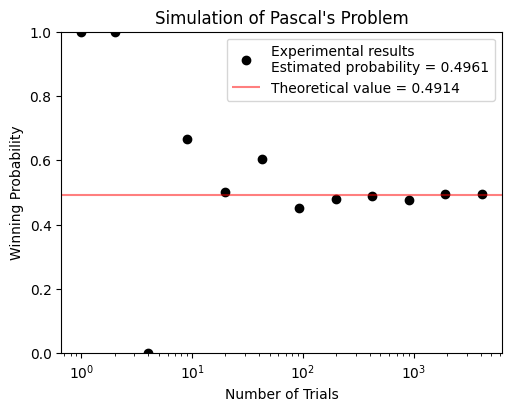

In [3]:
from scripts.testFuncs import test1

test1()

#### What have we learned in the Pascal's problem?

1. As the number of trials increases, __the winning probability tempts to converge__.

2. According to our derivation, the probability of not rolling a double $6$ in $24$ consecutive times is $(\frac{35}{36})^{24} \approx 0.4914$.
    
- After this simulation, we can confirm that this is truth.

- - -

### $\pi$ Estimation

- One of the most historical achievement in mathematics is the estimation of the mathematical constant, $\pi$. The approximation reached an accuracy within $0.04%$ of the true value before the beginning of the Common Era. Nowadays, the current record of approximation error is within 100 trillion ($10^{14}$) digits.

- Long before computers were invented, the French mathematicians [Buffon (1707-1788)](https://en.wikipedia.org/wiki/Georges-Louis_Leclerc,_Comte_de_Buffon) and [Laplace (1749-1827)](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace) proposed using a stochastic simulation to estimate the value of $\pi$.

- Today, we are going to use the computer to solve this issue.

<center>
<img align="center" height=300px width=auto src="./assets/fig01.png">
</center>

- To solve this, let's assume $P_0 (x,y)$ is a point sampled from $R = [-1,1] \times [-1,1]$. What we are interesting is the probability that $P_0$ is in the circle?

    1. The area of the square is $A_1 = 4$.

    2. The area of the circle is $A_2 = \pi \cdot 1^2 = \pi$.

    3. The probability that $P_0$ is in the circle is $\frac{A_2}{A_1} = \frac{\pi}{4}$.

    4. Let’s assume we have $N$ points which are uniformly sampled from $R = [-1,1] \times [-1,1]$. And we found that $m$ points are in the circle. We can estimate the value of $\pi$ based on $\pi \approx \frac{4m}{N}$.

- Also, we can write a stochastic program to simulate this estimation.

Est. = 2.760000, STD = 1.849973, numData = 1
Est. = 3.260000, STD = 1.006181, numData = 2
Est. = 3.160000, STD = 0.821219, numData = 4
Est. = 3.097143, STD = 0.676992, numData = 7
Est. = 3.065000, STD = 0.442465, numData = 16
Est. = 3.125000, STD = 0.304651, numData = 32
Est. = 3.138413, STD = 0.196775, numData = 63
Est. = 3.156220, STD = 0.126871, numData = 127
Est. = 3.154063, STD = 0.115054, numData = 256
Est. = 3.141797, STD = 0.072225, numData = 512
Est. = 3.139883, STD = 0.048022, numData = 1024
Est. = 3.145508, STD = 0.033561, numData = 2048
Est. = 3.142496, STD = 0.026212, numData = 4095
Est. = 3.144832, STD = 0.018347, numData = 8191
Est. = 3.142201, STD = 0.011597, numData = 16383
Est. = 3.141176, STD = 0.009859, numData = 32768


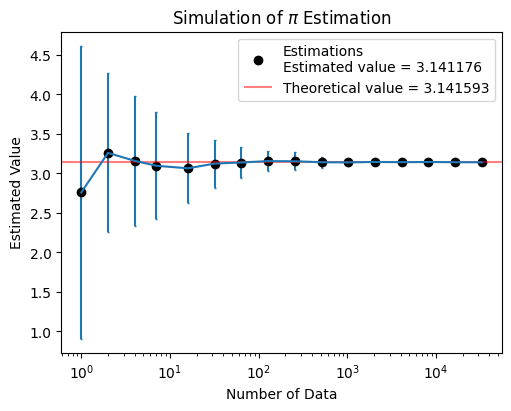

In [1]:
from scripts.testFuncs import test2

test2(numTrials=100, toPrint=True)

#### What have we learned in the $\pi$ Estimation?

1. As the number of data increases, **the estimated value tempts to converge** and **the standard deviation of estimations is decreasing**.

2. According to our simulation, we can only get a **“close”** result of $\pi$, which means that we will never acquire an correct answer.
    
- - -

<a id="tag1"></a>

## **Limit Theorems**

### Law of large numbers

#### The Expectation of Sample Means (The Means of the Samples)

- Why can we acquire an estimation that is more and more accurate as the number of data increasing?

- For **independent and identically distributed (i. i. d.)** random variables $X_1, X_2, \dots, X_n$, the **sample mean** $\bar{X}$ is defined as

$$
\bar{X} = \frac{X_1 + X_2 + \dots + X_n}{n}
$$

- Since the $X_i$'s are random variables, the sample mean $\bar{X}$ is also a random variable. Thus we have

$$
\begin{aligned}

\mathbb{E} [\bar{X}] &= \frac{\mathbb{E} [X_1] + \mathbb{E} [X_2] + \dots + \mathbb{E} [X_n]}{n} \\
&= \frac{n \cdot \mathbb{E} [X]}{n} = \mathbb{E} [X]

\end{aligned}
$$

- The above equation means that, as the number of sample increasing, **the expectation of sample means** is equal to **the expectation of the population mean**.

- - -

#### The Variance of the Sample Means

- Also, the variance of the sample mean $\bar{X}$ is given by

$$
\begin{aligned}

\text{Var} [\bar{X}] &= \frac{ \text{Var} [X_1 + X_2 + \dots + X_n] }{n^2} \\
&= \frac{ \text{Var}[X_1] + \text{Var}[X_2] + \dots + \text{Var}[X_n] }{n^2} \\
&= \frac{ n \cdot \text{Var}[X] }{n^2} = \frac{\text{Var}[X]}{n}

\end{aligned}
$$

- This means that, as the number of sample increasing, **the variance of the sample means** is equal to **the variance of the population divided by the sample size, n**.

- Therefore, we get the **weak law of large numbers (WLLN)**. For any $\epsilon > 0$,

$$
\lim_{n \to \infty} P(|\bar{X} - \mu| \geq \epsilon) = 0
$$


### The Central Limit Theorem (CLT)

- Given a set of sufficiently large samples drawn from the same population, **the sample means will be approximately normally distributed**, i.e., the distribution of sample means will be a normal distribution.

- This normal distribution will **have a mean close to the mean of the population**.

- The variance of the sample means will be **close to the variance of the population divided by the sample size**.

- - -

<a id="tag2"></a>

## **Monte Carlo method**

- A numerical approach for acquiring **an approximate solution** of a problem that is **difficult to solve its analytical solution**.

- It is an approximate solution based on the law of large numbers. This implies that it can only provide a close enough solution, not correct answer.

- General flowchart:

    1. Define a domain of possible inputs.
    
    2. Generate inputs randomly from a probability distribution over the domain.
    
    3. Perform a deterministic computation on the inputs.
    
    4. Aggregate the results.

- - -

<a id="tag3"></a>

### 1. Area Estimation

<center>
<img align="center" height=300px width=auto src="./assets/fig02.png">
</center>

- Calculate the area of gray region.

    1. Domain of possible inputs: $ x, y \isin [0, 1]$

    2. Randomly and uniformly generate $N$ samples over the domain.

    3. Count 1 if the sample satisfies the conditions ($ M = M +1 $)

    $$
    x^2 + y^2 \leq 1 \\
    (x-1)^2 + (y-1)^2 \leq 1
    $$

    4. Aggregate the result by 
    
    $$
    \text{Estimation} = \frac{M}{N}
    $$

Est. = 0.60000, STD = 0.48990, numData = 1
Est. = 0.59000, STD = 0.37000, numData = 2
Est. = 0.58750, STD = 0.25341, numData = 4
Est. = 0.57571, STD = 0.18234, numData = 7
Est. = 0.59375, STD = 0.11908, numData = 16
Est. = 0.56531, STD = 0.09015, numData = 32
Est. = 0.56444, STD = 0.05559, numData = 63
Est. = 0.56976, STD = 0.04705, numData = 127
Est. = 0.57762, STD = 0.02971, numData = 256
Est. = 0.56977, STD = 0.02238, numData = 512
Est. = 0.56828, STD = 0.01551, numData = 1024
Est. = 0.57007, STD = 0.01011, numData = 2048
Est. = 0.57106, STD = 0.00802, numData = 4095
Est. = 0.57098, STD = 0.00534, numData = 8191
Est. = 0.57129, STD = 0.00391, numData = 16383
Est. = 0.57062, STD = 0.00263, numData = 32768


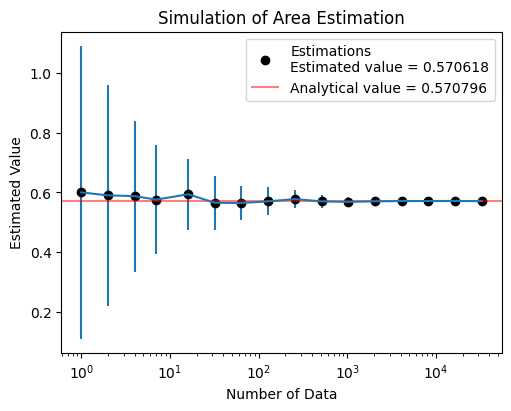

In [5]:
from scripts.testFuncs import test3

test3(numTrials=100, toPrint=True)

<a id="tag4"></a>

### 2. Univariate Integration

<center>
<img align="center" height=300px width=auto src="./assets/fig03.png">
</center>

- Given an univariate function $f(x)$, calculate a definite integral $I$ from $a$ to $b$.

    $$
    I = \int_{a}^{b} {f(x)} \,{\rm d}x \\
    f(x) = \frac{x}{2}
    $$

    1. Domain of possible inputs: $ x \isin [1.2, 3.5]$

    2. Randomly and uniformly generate $N$ samples over the domain.

    3. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{(b-a)}{N} \sum_{i=1}^{N} f(x_i)
    $$


Est. = 2.63353, STD = 0.81908, numData = 1
Est. = 2.70533, STD = 0.54810, numData = 2
Est. = 2.70843, STD = 0.35946, numData = 4
Est. = 2.71066, STD = 0.30192, numData = 7
Est. = 2.71628, STD = 0.19320, numData = 16
Est. = 2.71491, STD = 0.13440, numData = 32
Est. = 2.70158, STD = 0.10555, numData = 63
Est. = 2.70030, STD = 0.06910, numData = 127
Est. = 2.70025, STD = 0.04961, numData = 256
Est. = 2.70618, STD = 0.03466, numData = 512
Est. = 2.70364, STD = 0.02414, numData = 1024
Est. = 2.69907, STD = 0.01507, numData = 2048
Est. = 2.70155, STD = 0.01312, numData = 4095
Est. = 2.70167, STD = 0.00781, numData = 8191
Est. = 2.70212, STD = 0.00592, numData = 16383
Est. = 2.70299, STD = 0.00386, numData = 32768


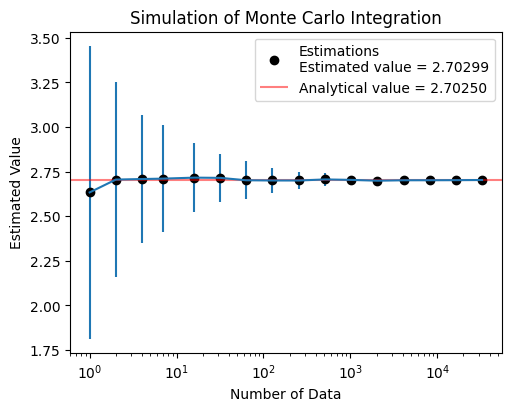

In [6]:
from scripts.testFuncs import test4

test4(numTrials=100)

- - -

#### Exercise 3.1: Monte Carlo Integration

<center>
<img align="center" height=300px width=auto src="./assets/fig04.png">
</center>

- Please estimate the area of function $f(x)$ from 0.5 to 3.0 based on Monte Carlo method.

$$
I = \int_{0.5}^{3.0} {f(x)} \,{\rm d}x \\
f(x) = \frac{1}{1 + \sin{x} \cdot (\ln{x})^2}
$$

- Please repeat your estimation 100 times. The standard deviation of your estimation in these 100 trials should be less than 0.01.

- - -

<a id="tag5"></a>

### 3. Monte Carlo Integration (multi-variate)

- Given a multi-variate function $f(\mathbf{x})$, calculate a definite integral $I$ in domain $\Omega$.

    $$
    I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x {\rm d}y \\
    $$

    1. Domain of possible inputs: $ \bold{x} \isin \Omega$

    2. Randomly and uniformly generate $N$ samples over the domain.

    3. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{\text{Area}(\Omega)}{N} \sum_{i=1}^{N} f(\mathbf{x}_i)
    $$

- However, the shape of domain $\Omega$ will affect the result of your estimation.

- - -

#### 3.1 Multi-variate Monte Carlo Integration on Rectangular Domain

<center>
<img align="center" height=300px width=auto src="./assets/fig05.png">
<img align="center" height=300px width=auto src="./assets/fig06.png">
</center>

- Given a multi-variate function $f(\mathbf{x})$, calculate a definite integral $I$ in domain $\Omega = [-1,1] \times [-1,1]$.

    $$
    I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x {\rm d}y \\
    f(x, y) = \frac{1}{2 \pi} \exp{ [- \frac{1}{2} (x^2 + y^2)] }
    $$

    1. Domain of possible inputs: $ \bold{x} \isin \Omega = [-1,1] \times [-1,1]$

    2. Randomly and uniformly generate $N$ samples over the domain $\Omega = [-1,1] \times [-1,1]$.

    3. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{\text{Area}(\Omega)}{N_{\Omega}} \sum_{i=1}^{N_{\Omega}} f(\mathbf{x}_i)
    $$

- - -

#### 3.2 Multi-variate Monte Carlo Integration on Non-rectangular Domain

<center>
<img align="center" height=300px width=auto src="./assets/fig07.png">
<img align="center" height=300px width=auto src="./assets/fig08.png">
</center>

- Given a multi-variate function $f(\mathbf{x})$, calculate a definite integral $I$ in domain $\Omega : x^2 + y^2 \leq 1$.

    $$
    I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x {\rm d}y \\
    f(x, y) = \frac{1}{2 \pi} \exp{ [- \frac{1}{2} (x^2 + y^2)] }
    $$

    1. Domain of possible inputs: $ \bold{x} \isin R = [-1,1] \times [-1,1]$

    2. Randomly and uniformly generate $N_R$ samples over the domain $R = [-1,1] \times [-1,1]$.

    3. Keep the samples in the domain $\Omega$. The number of samples in the domain is approximately $N_{\Omega}$.

    4. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{\text{Area}(\Omega)}{N} \sum_{i=1}^{N} f(\mathbf{x}_i)
        = \frac{\text{Area}(R)}{N_{R}} \sum_{i=1}^{N_{\Omega}} f(\mathbf{x}_i) \\
    
    \because \frac{N_{\Omega}}{N_R} = \frac{\text{Area}(\Omega)}{\text{Area}(R)}
    $$


Est. = 0.23179, STD = 0.67125, numData = 1
Est. = 0.47301, STD = 0.61663, numData = 2
Est. = 0.41743, STD = 0.40218, numData = 4
Est. = 0.39106, STD = 0.30915, numData = 7
Est. = 0.38762, STD = 0.19810, numData = 16
Est. = 0.37335, STD = 0.14392, numData = 32
Est. = 0.39914, STD = 0.10636, numData = 63
Est. = 0.38918, STD = 0.05889, numData = 127
Est. = 0.38600, STD = 0.04745, numData = 256
Est. = 0.39646, STD = 0.03066, numData = 512
Est. = 0.39909, STD = 0.02671, numData = 1024
Est. = 0.39638, STD = 0.01591, numData = 2048
Est. = 0.39496, STD = 0.01299, numData = 4095
Est. = 0.39562, STD = 0.00901, numData = 8191
Est. = 0.39430, STD = 0.00547, numData = 16383
Est. = 0.39366, STD = 0.00484, numData = 32768


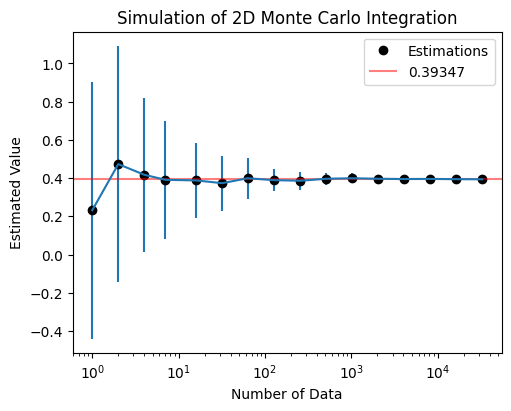

In [7]:
from scripts.testFuncs import test5

L = 2
test5(numTrials=64, a=(-L, -L), b=(L, L))

- - -

### Exercise 3.2: Multi-variate Monte Carlo Integration

<center>
<img align="center" height=300px width=auto src="./assets/fig09.png">
</center>

- Please estimtate the definite integral of function $f(x, y)$ over domain $\Omega$ based on Monte Carlo method.

$$
\begin{aligned}

& I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x{\rm d}y \\
& f(x, y) = \exp{(- \frac{x'^2 + \gamma^2 y'^{2}}{2 \sigma^2} )} \cdot \exp{[ -j (\frac{2 \pi}{\lambda} x' + \phi)]} \\

& \begin{bmatrix} x' \\ y' \end{bmatrix} = 
\begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} \\

\end{aligned}
$$

- The condition of this exercise:

$$
\begin{aligned}

& \Omega : \frac{|x - 0.3|}{2} + |y - 0.3| \leq 0.25 \\

& (\sigma, \gamma, \theta, \lambda, \phi) = (0.4, 2, \frac{\pi}{4}, 1, 0)

\end{aligned}
$$

- Please repeat your estimation 100 times. The standard deviation of your estimation in these 100 trials should be less than 0.01.

- - -

### Summary of Monte Carlo Method

- A numerical approach for acquiring **an approximate solution** of a problem that is **difficult to solve its analytical solution**.

- It is an approximate solution based on **the law of large numbers**. This implies that it **can only provide a close enough solution, not correct answer**.

- General flowchart:

    1. Define a domain $\Omega$ of possible inputs, $\bold{x} \isin \Omega$.
    
    2. Randomly generate $N_R$ samples from a probability distribution (usually use uniform distribution) over the domain $R$. The target domain $\Omega$ should be in the domain $R$ ($\Omega \isin R$). 

    3. Keep the samples in the domain $\Omega$. The number of samples in the domain is approximately $N_{\Omega}$.
    
    4. Perform a deterministic computation on the inputs.
    
    5. Aggregate the results.

<details>

<summary>Don't click this</summary>

<ul>

<li>
<details><summary>Exercise 3.1</summary>

```python
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import quad
from .utils import getIntegralEst


def exercise1(numTrials=100, numData=2**15, **kwargs):
    a = kwargs.get("a", 0.5)
    b = kwargs.get("b", 3.)
    func = kwargs.get("func", lambda x: (1 + np.sin(x) * (np.log(x))**2)**(-1))
    toPrint = kwargs.get("toPrint", True)

    xVals, yEsts, yStds= [], [], []

    xAxis = np.geomspace(1, numData, 16, dtype=np.int64)

    for val in xAxis:
        curEst, std = getIntegralEst(
            numData=val, 
            numTrials=numTrials, 
            a=a, 
            b=b, 
            func=func
        )
        
        xVals.append(val)
        yStds.append(std)
        yEsts.append(curEst)

        if toPrint:
            print("Est. = {:.05f}, STD = {:.05f}, numData = {}".format(curEst, std, val))
    
    fig = plt.figure(figsize=(5,4), dpi=100, layout="constrained", facecolor="w")
    
    ax1 = fig.add_subplot(111)
    ax1.errorbar(
        x=xVals,
        y=yEsts,
        yerr=yStds,
    )
    ax1.plot(xAxis, yEsts, 'ko', label="Estimations")
    ax1.set_title("Exercise 1")
    ax1.set_xlabel("Number of Data")
    ax1.set_ylabel("Estimated Value")
    ax1.set_xscale("log")

    xMin, xMax = ax1.get_xlim()
    scipyResult = quad(func=func, a=a, b=b)
    ax1.hlines(
        scipyResult[0],
        xmin = xMin, 
        xmax = xMax, 
        colors = 'r', 
        alpha = 0.5,
        label = "{:.05f}".format(scipyResult[0])
    )
    ax1.legend(loc="best")
    
    plt.show()
```

</details>
</li>

<li>
<details><summary>Exercise 3.2</summary>

```python
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import quad


def exercise2(numTrials=100, numData=2**15, **kwargs):
    def est4exercise2(numData, numTrials, a, b, func):
        estimates = []
        for t in range(numTrials):
            integralGuess = mcFunc4exercise2(numData, a=a, b=b, func=func)
            estimates.append(integralGuess)
        std = np.std(estimates)
        curEst = sum(estimates)/len(estimates)
        return (curEst, std)

    def mcFunc4exercise2(numData, a, b, func):
        I = 0.
        a1, a2, b1, b2 = a[0], a[1], b[0], b[1]
        for data in range(numData):
            x = (b1-a1)*random.random() + a1
            y = (b2-a2)*random.random() + a2
            if abs(x-0.3)/2 + abs(y-0.3) <= 0.25:
                I += func(x, y)
        return 1*0.5*0.5*I/numData
    
    def gabor(x, y):
        """Simple version Gabor function for Monte Carlo"""
        sigma, theta, gamma = 0.4, np.pi/4, 2
        sigma_x = sigma
        sigma_y = sigma / gamma
        # Rotation
        x_theta = x * np.cos(theta) + y * np.sin(theta)
        y_theta = -x * np.sin(theta) + y * np.cos(theta)
        gb = np.exp(
            -0.5 * (x_theta**2 / sigma_x**2 + y_theta**2 / sigma_y**2)
        ) * np.cos(2 * np.pi * x_theta)
        return gb

    a = kwargs.get("a", (-0.2, 0.05))
    b = kwargs.get("b", (0.8, 0.55))
    func = kwargs.get("func", gabor)
    toPrint = kwargs.get("toPrint", True)

    xVals, yEsts, yStds= [], [], []
    xAxis = np.geomspace(1, numData, 16, dtype=np.int64)

    for val in xAxis:
        curEst, std = est4exercise2(
            numData=val, 
            numTrials=numTrials, 
            a=a, 
            b=b, 
            func=func,
        )
        
        xVals.append(val)
        yStds.append(std)
        yEsts.append(curEst)

        if toPrint:
            print("Est. = {:.05f}, STD = {:.05f}, numData = {}".format(curEst, std, val))
    
    fig = plt.figure(figsize=(5,4), dpi=100, layout="constrained", facecolor="w")
    
    ax1 = fig.add_subplot(111)
    ax1.errorbar(
        x=xVals,
        y=yEsts,
        yerr=yStds,
    )
    ax1.plot(xAxis, yEsts, 'ko', label="Estimations")
    ax1.set_title("Simulation of 2D Monte Carlo Integration")
    ax1.set_xlabel("Number of Data")
    ax1.set_ylabel("Estimated Value")
    ax1.set_xscale("log")
    ax1.legend(loc="best")
    
    plt.show()
```

</details>
</li>

</details>